## Task 3 : Exploratory Data Analysis - Retail
## GRIP @ The Sparks Foundation
### Name : Venkateswara Rao Addanki
### Problem Statement
### Predict the percentage of an student based on the no. of study hours.
### predict score if a student studies for 9.25 hrs/ day

In [1]:
# Importing librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
# % matpllotlib inline

### Reading the data file

In [2]:
df= pd.read_csv('student.csv') 

In [3]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
df.shape

(25, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Finding null values

In [6]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

 By using above information we can conclude that there is no null values in the given dataset

In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Here our target variable is SCORE

<AxesSubplot:xlabel='Hours', ylabel='Scores'>

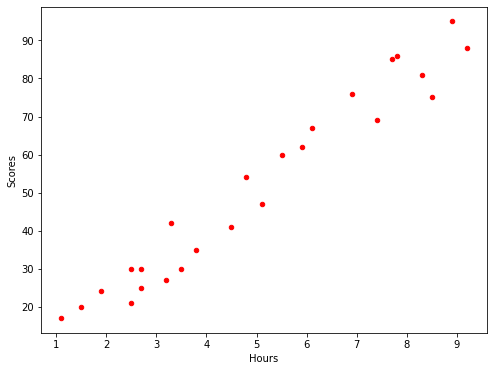

In [8]:
# visualize the relationship between the Hours and score using scatterplots
df.plot(kind='scatter', x='Hours', y='Scores', color = "red", figsize=(8, 6))


In [9]:
# create X and y

x = df.iloc[:,:1].values
y = df.iloc[:,1].values



In [10]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

In [12]:
# using the linear regression model

lm = LinearRegression()
lm.fit(x, y)

# print intercept and coefficients
print("Intercept:- ", lm.intercept_)
print("coefficient:- ", lm.coef_)

Intercept:-  2.483673405373196
coefficient:-  [9.77580339]


## Prediction using the model

#### If the student studies for 9.25hr/day

#####                                                                                             𝑦=𝛽0+𝛽1𝑥
 
#####                                                                          𝑦 = 2.483673405373196 + 9.77580339 × 9.25

In [13]:
#calculate the prediction
2.483673405373196 + 9.77580339 * 9.25

92.9098547628732

Now we are finding same thing using code

In [14]:
#  Let's create a DataFrame since the model expects it
X_new = pd.DataFrame({'Hours': [9.25]})
X_new.head()

,Hours
0,9.25


In [15]:
# use the model to make predictions on a new value
lm.predict(X_new)

array([92.90985477])

## Ploting least square line

In [16]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'Hours': [df.Hours.min(), df.Hours.max()]})
X_new.head()

,Hours
0,1.1
1,9.2


In [17]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

array([13.23705714, 92.4210646 ])

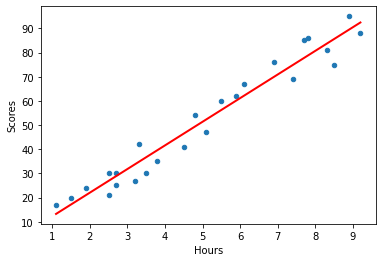

In [18]:
# first, ploting the observed data
df.plot(kind='scatter', x='Hours', y='Scores')

# then, ploting the least squares line
plt.plot(X_new, preds, c='red', linewidth=2)

# THE END